# LAB 9 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PCA

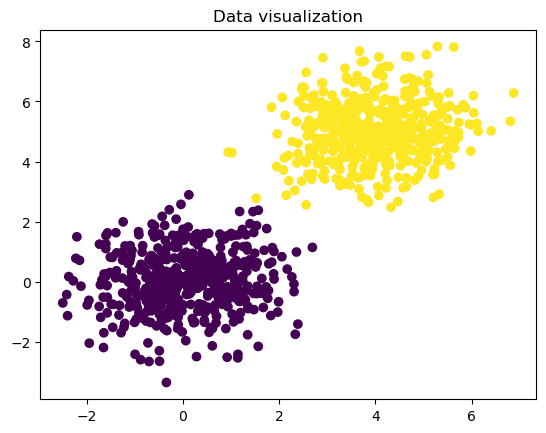

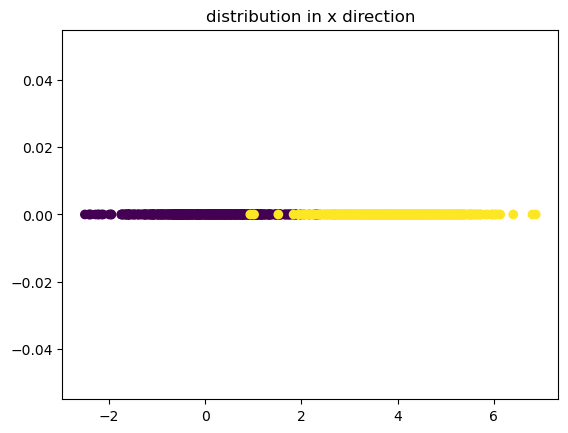

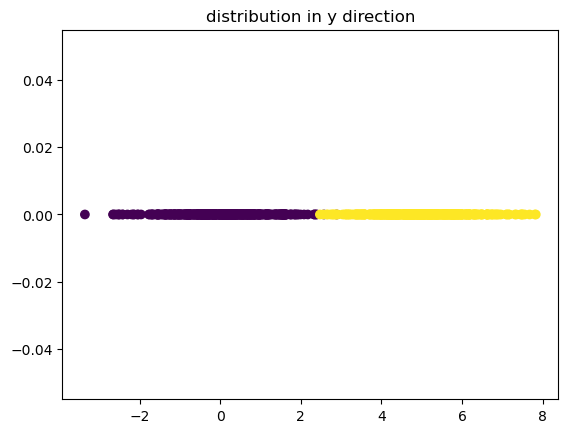

In [2]:
meanx=np.array([0,0])
meany=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(meanx,var,500)
data2=np.random.multivariate_normal(meany,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()

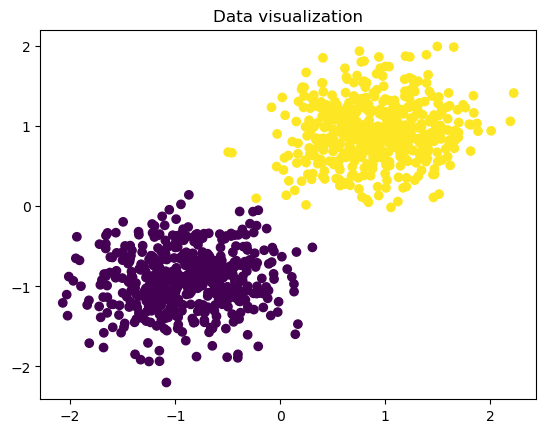

In [3]:
# Data normalization

# Perform data normalization here using mean substraction and std division
## Write your code here
mean=np.mean(data[:,0])
mean1=np.mean(data[:,1])
std=np.std(data[:,0])
std1=np.std(data[:,1])

data[:,0]=(data[:,0]-mean)/std
data[:,1]=(data[:,1]-mean1)/std1

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.show()


variance along pca1 direction= 1.847766384345971
variance along pca2 direction= 0.15223361565402696


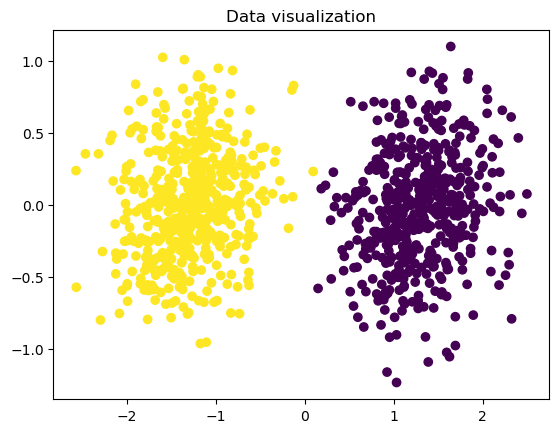

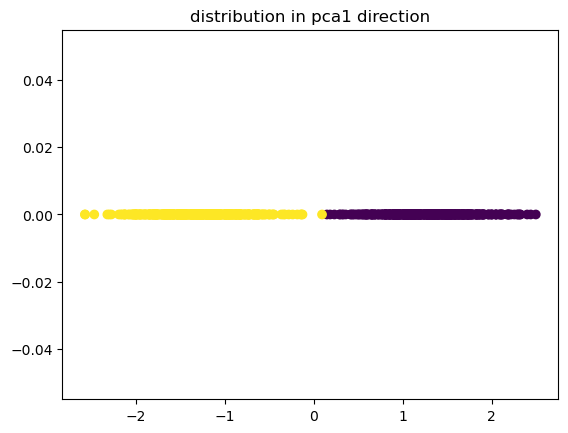

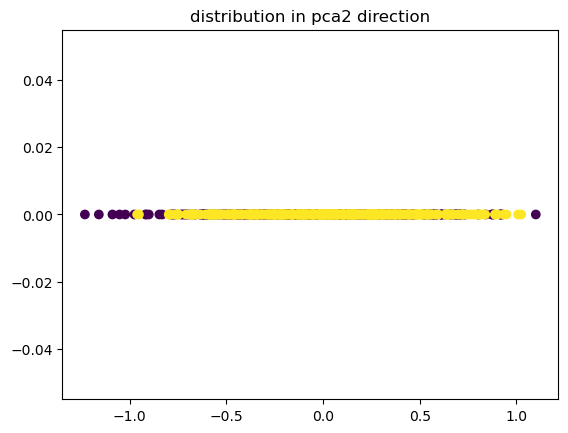

In [4]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=np.dot(data,u) ## Write your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1) 
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')
plt.show()

In [5]:
print(u)
print(s)
print(v)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1847.76638435  152.23361565]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [6]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
  def pca_comp(self,data):
    data=self.pre_process(data)
    cov= data.T @ data## Write your code here
    u,_,_=np.linalg.svd(cov) # singular value decomposition

    u_req=u[:,:self.retain_dim] ## Write your code here
    trans_data= data.dot(u_req)## Write your code here
    return trans_data,u_req
    # compute the required retain dimension
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
    ind= np.argmax(s)## Write your code here  
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

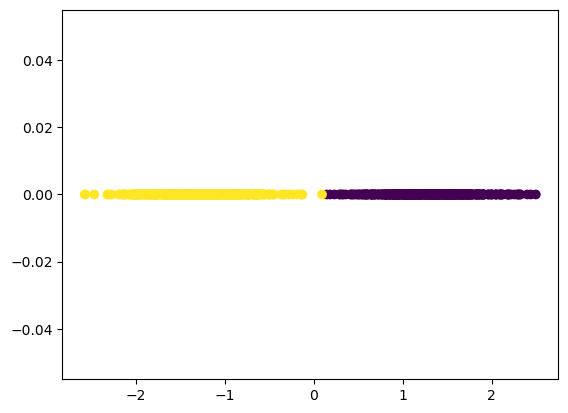

In [7]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
# print(trans_data)
# print(trans_mat)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)
plt.show()

In [8]:
print(trans_data.shape)

(1000, 1)


In [9]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction
# trans_data=np.asarray(trans_data)
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(meanx,var,50)
data2=np.random.multivariate_normal(meany,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)


KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

## PCA on MNIST

In [10]:
# !pip install idx2numpy

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

(100, 784)
(100,)


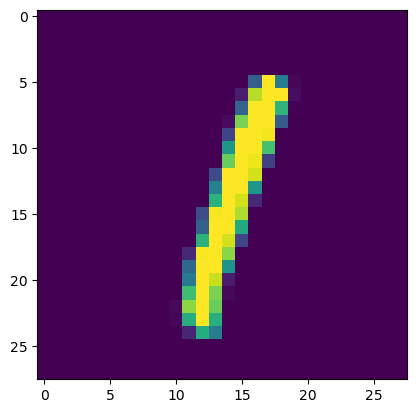

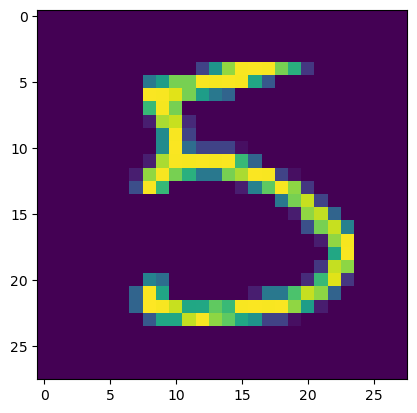

In [12]:
# MNIST data

file1='./lab_files/Lab_08/t10k-images-idx3-ubyte' ## Change the path accordingly
file2='./lab_files/Lab_08/t10k-labels-idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 1
KNN Training accuracy = 97.0
(50, 28, 28)
KNN Testing accuracy = 96.0


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

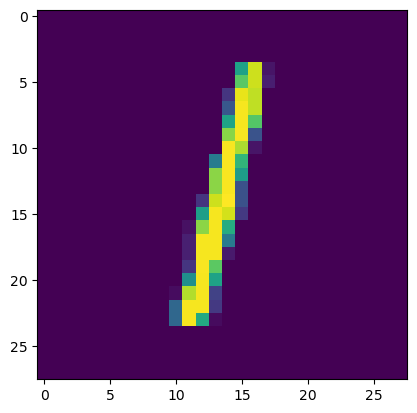

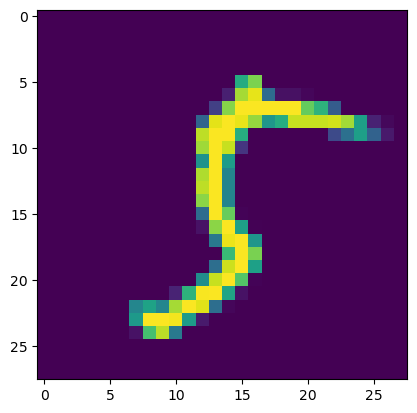

In [13]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))
data_tst = data_tst.astype('float32')

data_tst /= 255

# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


**Perform PCA on MNIST and Classify taking the data with any 3 Classes**

(150, 784)
(150,)


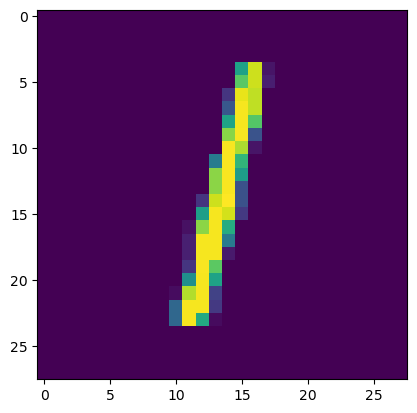

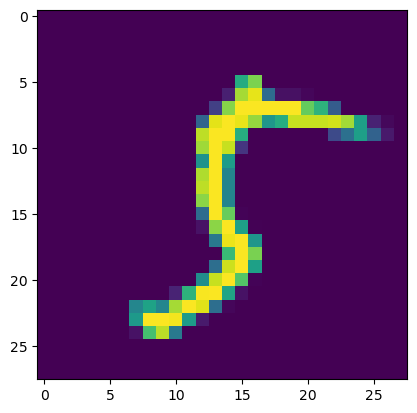

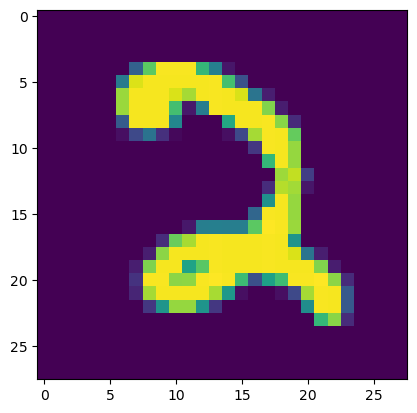

In [14]:
## Write your code here
cl=[1,5,2]
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 2
id_2=np.where(labels==cl[2])
id2=id_2[0]
id2=id2[100:150]
Im_2=Images[id2,:,:]
lab_2=labels[id2]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_2[1,:,:])

data=np.concatenate((Im_1,Im_5,Im_2))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5,lab_2))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

Initial data dimension= 784
KNN Training accuracy = 80.66666666666666
KNN Testing accuracy = 80.66666666666666


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

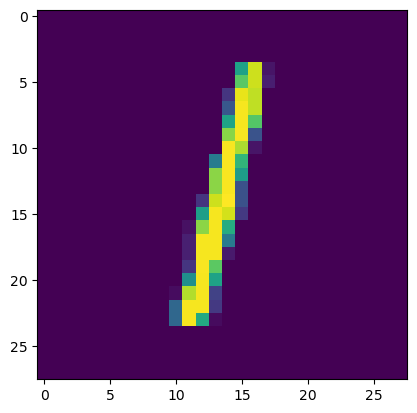

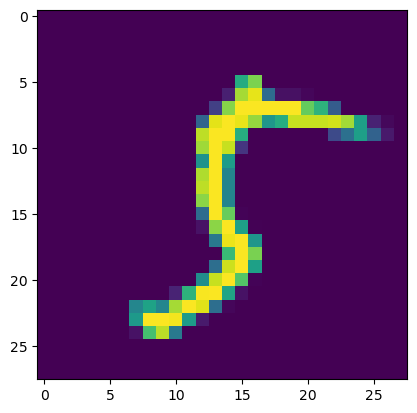

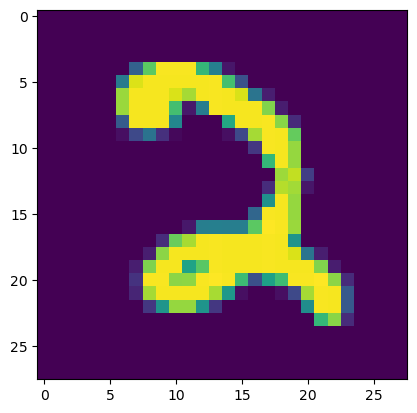

In [15]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
# print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)
## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 2
id_2=np.where(labels==cl[2])
id2=id_2[0]
id2=id2[100:150]
Im_2=Images[id2,:,:]
lab_2=labels[id2]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_2[1,:,:])
# print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_2))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5,lab_2))
data_tst = data_tst.astype('float32')

data_tst /= 255

# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)

# LDA

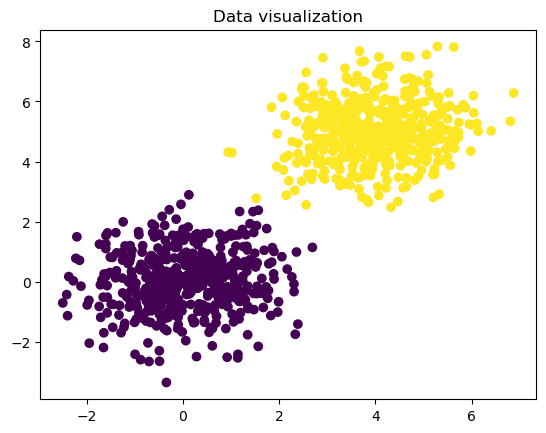

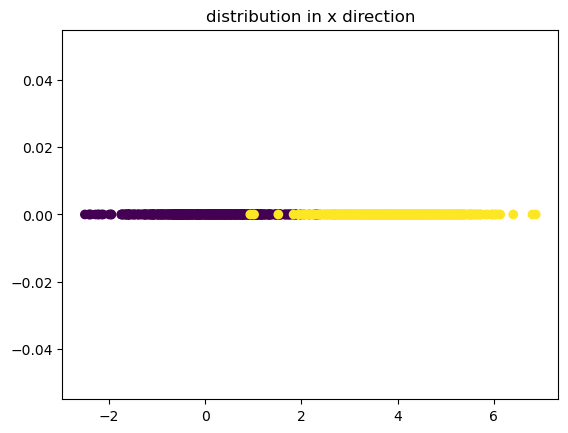

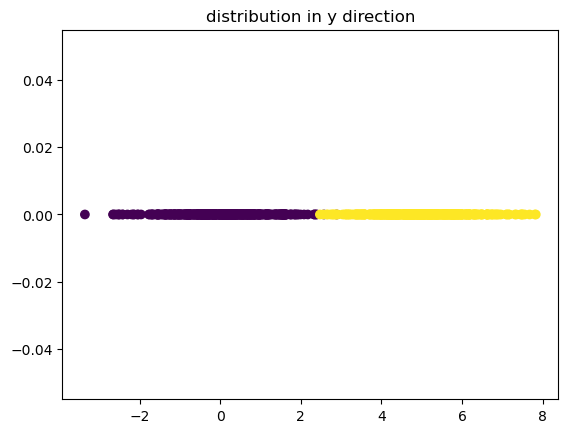

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()

In [17]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))

  total_mean=np.mean(data) 
  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]=(data_l[i]-mean_l[i]).T.dot((data_l[i]-mean_l[i])) ## Write your code here
    S_w=S_w+cov_l[i]
    mean_diff=(mean_l[i] - total_mean).reshape(data.shape[1], 1)

  S_w=S_w/len(data_l)

  if len(data_l)==2:
    S_b=mean_diff.dot(mean_diff.T) ## Write your code here
    u,_,_ = np.linalg.svd(np.linalg.pinv(S_w).dot(S_b))
    w=  u[:,:len(data_l)-1]## Write your code here

  else:
    S_t=np.cov(data,rowvar=False)
    S_b=  S_t - S_w## Write your code here
    u,_,_= np.linalg.svd(np.linalg.pinv(S_w).dot(S_b))## Write your code here
    w=u[:,:len(data_l)-1]

  return w




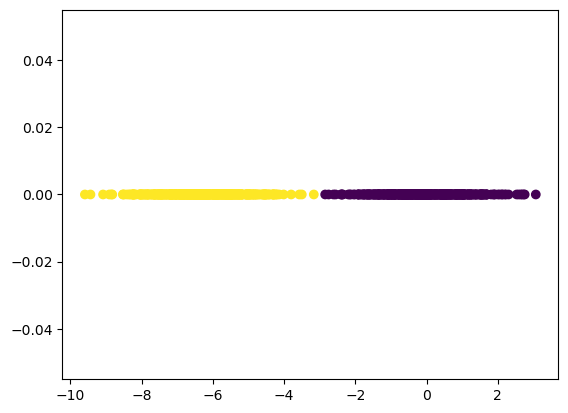

In [18]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c=label)
plt.show()

In [19]:
# Classification using LDA
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction
trans_data=data @ w
## Write your code here
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(meanx,var,50)
data2=np.random.multivariate_normal(meany,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(data@w,tst_label)*100)

KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

## LDA Multiclass

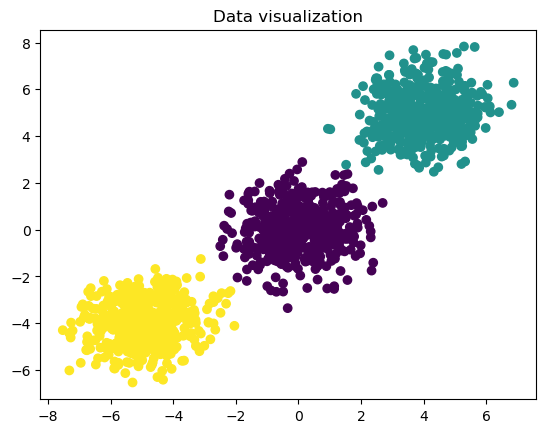

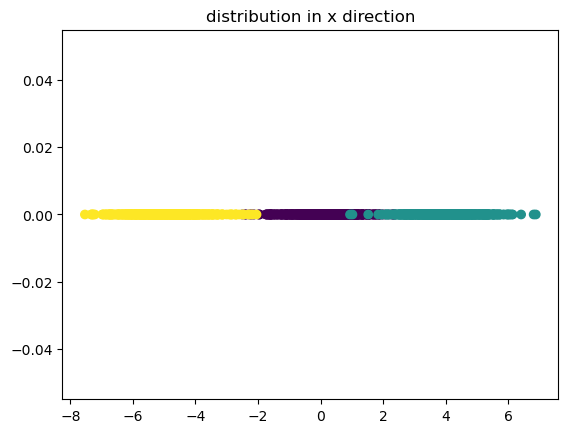

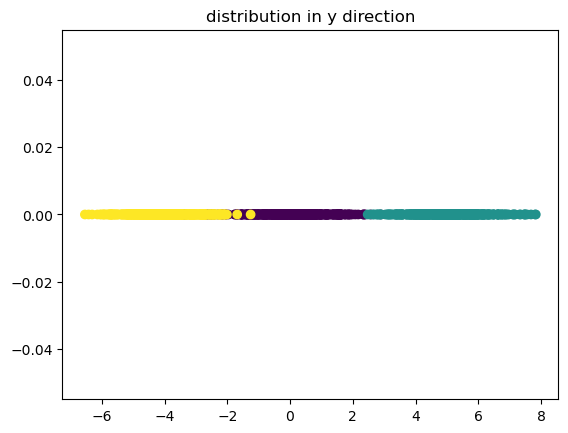

In [20]:
mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')
plt.show()

(2, 2)
[[-0.71159731  0.70258755]
 [ 0.70258755  0.71159731]]


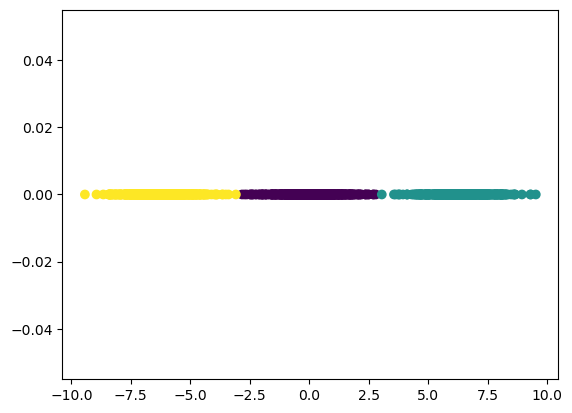

In [21]:
# after projection
w=LDA(data,label)
print(w.shape)
print(w)
plt.figure()
plt.scatter(data @ w[:,1],np.zeros(data.shape[0]),c=label) # by performing 1D projection
plt.show()

In [22]:
# Testing (using KNN)
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction
trans_data=data @ w[:,1]
l=len(trans_data)
trans_data=trans_data.reshape(l,1)
## Write your code here
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(meanx,var,50)
data2=np.random.multivariate_normal(meany,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score((data@w[:,1]).reshape(data.shape[0],1),tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

**Perform LDA on MNIST and Classify using the data of any 3 classes**

(150, 784)
(150,)


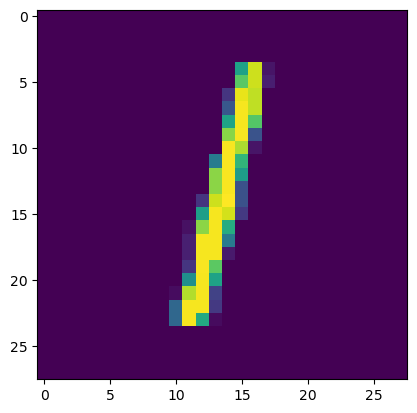

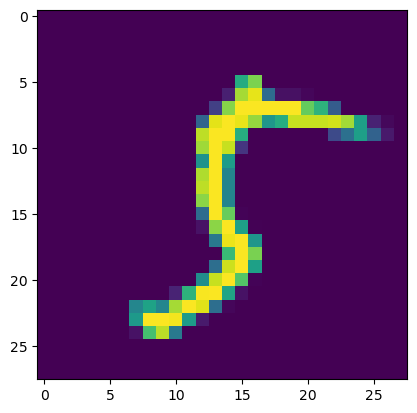

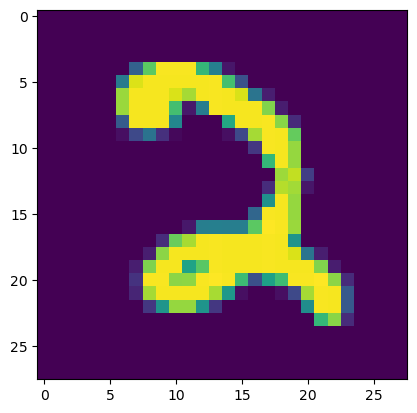

In [23]:
## Write your code here
## Write your code here
cl=[1,5,2]
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 2
id_2=np.where(labels==cl[2])
id2=id_2[0]
id2=id2[100:150]
Im_2=Images[id2,:,:]
lab_2=labels[id2]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_2[1,:,:])

data=np.concatenate((Im_1,Im_5,Im_2))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5,lab_2))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

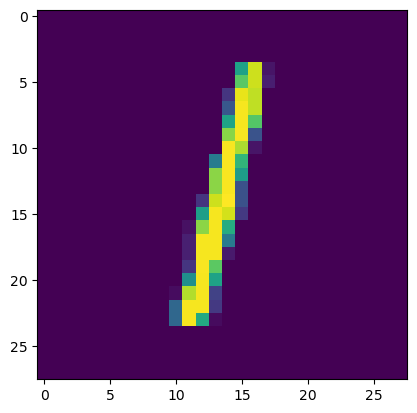

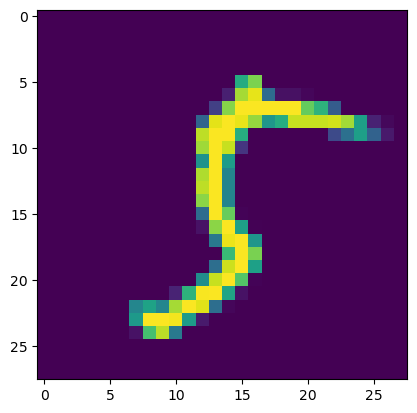

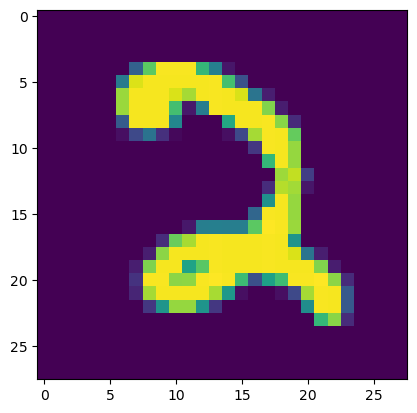

In [24]:

w=LDA(data,G_lab)
# print(w)

trans_data=data @ w[:,1]
l=len(trans_data)
trans_data=trans_data.reshape(l,1)
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)
## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

# for class 2
id_2=np.where(labels==cl[2])
id2=id_2[0]
id2=id2[100:150]
Im_2=Images[id2,:,:]
lab_2=labels[id2]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_2[1,:,:])
# print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_2))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5,lab_2))
data_tst = data_tst.astype('float32')

data_tst /= 255

# final testing
print('KNN Testing accuracy =',knn.score((data_tst@w[:,1]).reshape(data_tst.shape[0],1),tst_lab)*100)